In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False

합성곱 신경망(Convolution Neural Network, CNN)

합성곱 신경망은 흔히 CNN이라고 부르는 방법으로 합성곱이라는 연산을 사용하는 신경망이다. CNN은 실제 여러 분야에서 사용되는 방법으로 특히 이미지 분류 작업에서 좋은 성능을 보여준다.

합성곱 연산은 아래와 같은 연산을 의미한다.

$$y(i) = (x \times w)(i) = \sum_{k=-\infty}^{-\infty} x(k)w(i - k)$$

위 식은 $i$ 시점에서의 입력 데이터 $x$값과 가중치 $w$값의 합성곱 연산의 결과는 $y(i)$와 같음을 나타낸다. 위 식석에서도 $k$도 시점을 의미하는데, 가중치 $w$의 시점은 $w(i)$가 아닌 $w(i - k)$임을 알 수 있다. 이를 플립(flip)이라고 하며 가중치 커널(kernel)이라고도 부른다. 플립은 우리말로 하면 '뒤집다'라는 뜻으로 가중치의 시점을 뒤집는다는 뜻이다. 위 식은 시점의 순서와 상관없이 결과가 동일하므로 아래와 같이 쓸 수도 있다.

$$y(i) = (x \times w)(i) = \sum_{k=-\infty}^{-\infty} x(i - k)w(k)$$

패딩(Padding)  
패딩은 입력 데이터 주변을 특정 값으로 채우는 것을 의미한다.

<img src="./images/cnn_1.png/" width="500"/>

신경망에 커널을 적용하면 층이 깊어질수록 데이터의 차원은 점점 줄어든다. 4 * 4 차원의 입력 데이터에 2 * 2 커널을 합성곱했을 때 출력 데이터의 차원은 3 * 3으로 입력 데이터보다 출력 데이터가 줄어든다. 이렇듯, 입력 데이터에 커널을 합성곱한 후 출력 데이터의 차원이 줄어드는 현상을 방지하기 위해서 패딩이라는 방법을 사용한다.

스트라이드(Stride)  
스트라이드는 한 번 합성곱 연산을 한 후 다음 계산 영역을 선택할 때 얼마나 이동할지 간격을 정하는 것이다.

<img src="./images/cnn_2.png/" width="400"/>

스트라이드 2를 적용한 후 합성곱 연산을 한 결과를 스트라이드 1때와 비교해 보면 출력 데이터 행렬의 차원이 더 적은 것을 알 수 있다.

풀링(Pooling)  
풀링은 데이터의 차원을 줄이는 방법이다.

<img src="./images/cnn_3.png/" width="300"/>

맥스 풀링이란 해당 영역에서 가장 큰 값을 선택하는 방법이다.

합성곱 신경망 실습  
합성곱 신경망을 이용해 손글씨 인식 모델을 생성해본다.

In [2]:
# 일관된 결과값이 나오도록 random seed를 설정한다.
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [3]:
# 데이터 불러오기
from tensorflow.keras import datasets # 텐서플로우가 제공하는 데이터셋을 사용하기 위해 import 한다.
# mnist 손글씨 데이터는 트레이닝 데이터와 테스트 데이터가 나눠서 저장되어 있다.
# load_data() 메소드는 (트레이닝 피쳐 데이터, 트레이닝 타겟 데이터)와 (테스트 피쳐 데이터, 테스트 타겟 데이터)를
# 튜플 형태로 묶서러 리턴한다.
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data() # 손글씨 데이터셋을 피쳐, 타겟 데이터로 저장한다.

In [4]:
# 오리지널 데이터 확인
# 트레이닝 피쳐 데이터의 차원을 확인하면 (이미지 개수, 행, 열) 형태로 나온다.
# 즉, 트레이닝 피쳐 데이터는 28행 * 28열의 이미지 60,000개로 구성되어 있는 것을 알 수 있다.
print(X_train.shape)
print(y_train.shape) # 트레이닝 타겟 데이터는 스칼라값 60,000개로 이루어진 벡터이다.
print(X_test.shape) # 테스트 피쳐 데이터는 28행 * 28열의 이미지 60,000개로 구성되어 있는 것을 알 수 있다.
print(y_test.shape) # 테스트 타겟 데이터는 스칼라값 10,000개로 이루어진 벡터이다.

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


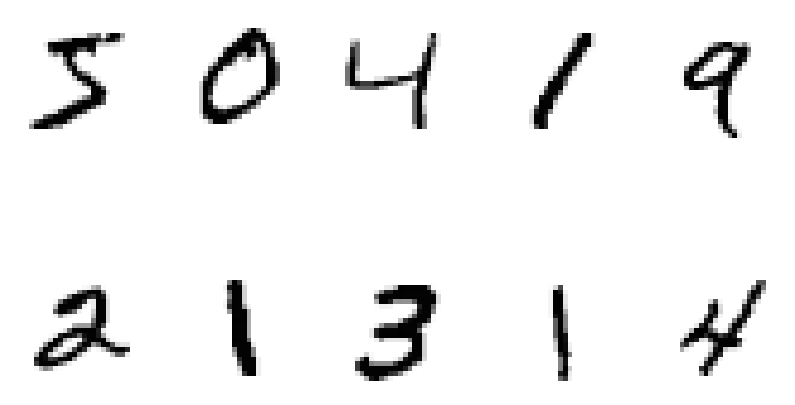

[5 0 4 1 9 2 1 3 1 4]


In [5]:
# 오리지널 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape((28, 28)), cmap='Greys')
    plt.axis('off')
plt.show()
print(y_train[:10])

In [6]:
# 타겟 데이터 종류 확인
# 타겟 데이터 종류를 확인함으로써 분류 문제인지 아니면 회귀 문제인지 파악할 수 있고, 분류 문제라면
# 몇 가지 클래스로 구분되는지 알 수 있다.
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [7]:
# 피쳐 데이터 스케일 조정
# 오리지널 데이터의 차원은 (이미지 개수, 행, 열) 형태의 3차원 데이터로 표현이 되어있지만 합성곱 신경망에 데이터를
# 넣으려면 4차원 형태의 (이미지 개수, 행, 열, 채널 개수) 형태로 구성해야 한다.
# 합성곱 신경망의 입력 데이터는 (이미지 개수, 행, 열, 채널 개수) 형태로 구성된다. 이때, 채널이란 흔히 RGB로 구분되는
# 것을 의미하는데, 만약 하나의 이미지 데이터를 R을 이용한 픽셀값, G를 이용한 픽셀값, B를 이용한 픽셀값으로 나타낼 때,
# 채널 개수는 3이 된다. 하지만 현재 분석에 사용되는 mnist 데이터는 흑백 이미지이므로 채널 수는 1이 된다.
# 합성곱 신경망에 사용할 이미지 데이터는 reshape() 메소드를 이용해 (이미지 개수, 행, 열, 채널 개수) 형태로 변형한다.
X_tn_re = X_train.reshape(60000, 28, 28, 1) # 트레이닝 피쳐 데이터의 차원을 바꿔준다.
X_tn = X_tn_re / 255 # 이미지 픽셀값은 0에서 255 사이에 있으므로 최대값이 1이 되도록 조정한다.
print(X_train.shape, X_tn_re.shape, X_tn.shape)
X_te_re = X_test.reshape(10000, 28, 28, 1) # 테스트 피쳐 데이터의 차원을 바꿔준다.
X_te = X_te_re / 255
print(X_test.shape, X_te_re.shape, X_te.shape)

(60000, 28, 28) (60000, 28, 28, 1) (60000, 28, 28, 1)
(10000, 28, 28) (10000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
# 타겟 데이터 원-핫 인코딩
from tensorflow.keras.utils import to_categorical # 원-핫 인코딩을 사용하기 위해 import 한다.
y_tn = to_categorical(y_train) # 트레이닝 타겟 데이터를 넣어서 원-핫 인코딩을 실행한다.
y_te = to_categorical(y_test) # 테스트 타겟 데이터를 넣어서 원-핫 인코딩을 실행한다.
print(y_tn[0], y_te[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


합성곱 신경망 모델을 만든다.

In [9]:
# 시퀀스 API를 사용한 합성곱 신경망 모델 생성에 필요한 라이브러리 import
from tensorflow.keras.models import Sequential # 시퀀스 API 신경망을 생성하기 위해 import 한다.
from tensorflow.keras.layers import Dense # 신경망에 추가할 완전 연결 layer를 생성하기 위해 import 한다.
from tensorflow.keras.layers import Conv2D # 신경망에 추가할 합성곱 layer를 생성하기 위해 import 한다.
from tensorflow.keras.layers import MaxPool2D # 신경망에 추가할 맥스 풀링 layer를 생성하기 위해 import 한다.
from tensorflow.keras.layers import Flatten # 신경망 모델을 최종 출력층에서 벡터 형태로 만들기 위해 import 한다.
from tensorflow.keras.layers import Dropout # 신경망에 추가할 드롭다운 layer를 생성하기 위해 import 한다.
n_class = len(set(y_train)) # 분류할 타겟 클래스의 개수를 저장한다.
# print(n_class) # 10

In [10]:
# Sequential 객체를 선언 후 Sequential 모델에 add() 메소드로 layer를 추가해서 쌓아올린다.
model = Sequential() # 신경망(CNN) 모델을 만든다.

# 신경망 모델에 input layer를 추가한다.
# input_shape 속성으로 Conv2D layer에 입력되는 데이터의 차원을 지정한다.
# filters 속성으로 Conv2D layer를 거쳐서 출력되는 데이터의 차원을 지정한다.
# kernel_size 속성으로 커널의 크기를 지정한다.
# padding 속성으로 패딩 방법을 지정한다. valid(기본값)은 패딩을 사용하지 않고 same은 패딩을 사용한다.
# activation 속성으로 활성화 함수를 지정한다.
# Conv2D layer의 Output Shape은 padding을 사용하지 않으면 입력 데이터 차원 수 + 1 - 커널의 차원 수로 결정되고
# padding을 사용하면 입력 데이터의 차원 수와 같아진다. 28 + 1 - 5 = 24, (None, 24, 24, 32)
# Conv2D layer의 Param은 kernel_size * 입력 채널 크기 * filters + filters마다 1개씩의 바이어스로 결정된다.
# kernel_size(5 * 5) * 입력 채널 크기(1) * filters(32) + ilters마다 1개씩의 바이어스(32) = 832
model.add(Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(5, 5), padding='valid', activation='relu'))
# input layer에 MaxPool layer를 추가한다.
# pool_size 속성으로 맥스 풀링을 실행할 픽셀의 크기를 지정한다. 기본값은 (2, 2)이다.
# MaxPool2D layer의 Output Shape은 입력 데이터의 차원수 / pool_size로 결정된다. 24 / 2 = 12, (None, 12, 12, 32)
# MaxPool2D layer는 Param이 없으므로 0이다.
model.add(MaxPool2D(pool_size=(2, 2)))
# input layer에 Dropout layer를 추가한다.
# Dropout layer를 추가할 때 드롭아웃(사용하지 않을) 할 노드의 비율을 지정한다.
# Dropout layer는 Output Shape이 변경되지 않고 Param도 없다.
model.add(Dropout(0.25))

# 신경망 모델에 hidden layer를 추가한다.
# input layer는 input_shape 속성으로 입력되는 데이터의 차원을 지정했지만 hidden layer에는 input layer의 출력이
# 입력으로 들어오기 때문에 input_shape 속성은 지정하지 않는다.
# Output Shape = 12 + 1 - 3 = 10, (None, 10, 10, 32)
# Param = 3 * 3 * 32 * 32 + 32 = 9248
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu'))
# hidden layer에 MaxPool layer를 추가한다.
# Output Shape = 10 / 2 = 5, (None, 5, 5, 32)
model.add(MaxPool2D(pool_size=(2, 2)))
# hidden layer에 Dropout layer를 추가한다.
model.add(Dropout(0.25))

# 신경망 모델에 output layer를 추가한다.
# 최종 출력층에서 소프트맥스 활성화 함수를 사용하기 위해서 벡터 형태로 펼쳐준다. => 1차원으로 만든다.
# Flatten layer의 Output Shape은 (5, 5, 32) 형태를 벡터 형태로 펼쳐주므로 5 * 5 * 32 = 800이 된다. (None, 800)
# Flatten layer는 Param이 없으므로 0이다.
model.add(Flatten())
# 최종 출력층은 Dense layer로 구성한다.
# Dense layer는 input_dim 속성으로 입력 데이터(피쳐)의 차원, units 속성으로 layer의 출력 차원, activation 속성으로
# 활성화 함수를 지정한다.
# output layer에는 hidden layer의 출력이 입력으로 들어오기 때문에 input_dim 속성은 지정하지 않는다.
# Dense layer의 Output Shape은 units 속성의 크기로 결정된다. (None, 1024)
# Dense layer의 Param은 (입력 크기 + 바이어스(무조건 1)) * 출력 크기로 결정된다. (800 + 1) * 1024 = 820224
model.add(Dense(units=1024, activation='relu'))
# output layer에 Dropout layer를 추가한다.
model.add(Dropout(0.5))
# output layer의 활성화 함수를 소프트맥스로 지정하고 최종 출력(타겟 클래스의 개수)을 구한다.
# Dense layer의 Output Shape은 units 속성의 크기로 결정된다. (None, 10)
# Param = (1024 + 1) * 10 = 10250
model.add(Dense(units=n_class, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)          0

In [11]:
# 모델 컴파일
# 분류 신경망은 loss 속성에 손실(비용, 오차)함수를 지정할 때 이진 분류 문제 binary_crossentropy를 지정하고, 
# 3개 이상의 클래스로 분류하는 다중 분류 문제에서는 categorical_crossentropy를 지정한다.
# optimizer 속성에 최적화 함수(일반적으로 adam)를 지정한다.
# metrics 속성에 평가 기준을 지정한다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# 신경망 학습
# 트레이닝 피쳐 데이터(X_tn)와 트레이닝 데이터에 따른 타겟 데이터(y_tn)를 지정하고 epochs 속성에
# epoch와 batch_size 속성에 batch_size를 지정한다. epochs가 커질 수록 정확도는 올라간다.
hist = model.fit(X_tn, y_tn, epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 29s 47ms/step - loss: 0.2312 - accuracy: 0.9279
Epoch 2/10
600/600 [==============================] - 27s 45ms/step - loss: 0.0779 - accuracy: 0.9755
Epoch 3/10
600/600 [==============================] - 28s 46ms/step - loss: 0.0575 - accuracy: 0.9824
Epoch 4/10
600/600 [==============================] - 28s 46ms/step - loss: 0.0485 - accuracy: 0.9851
Epoch 5/10
600/600 [==============================] - 27s 46ms/step - loss: 0.0419 - accuracy: 0.9869
Epoch 6/10
600/600 [==============================] - 27s 46ms/step - loss: 0.0374 - accuracy: 0.9884
Epoch 7/10
600/600 [==============================] - 29s 48ms/step - loss: 0.0349 - accuracy: 0.9889
Epoch 8/10
600/600 [==============================] - 27s 46ms/step - loss: 0.0312 - accuracy: 0.9903
Epoch 9/10
600/600 [==============================] - 27s 46ms/step - loss: 0.0291 - accuracy: 0.9908
Epoch 10/10
600/600 [==============================] - 27s 46ms/step - loss: 0.027

In [13]:
# 신경망 학습 평가
print(model.evaluate(X_tn, y_tn)) # 트레이닝 피쳐 데이터를 트레이닝 피처 타겟 데이터와 학습 평가
print(model.evaluate(X_te, y_te)) # 테스트 피쳐 데이터를 테스트 피처 타겟 데이터와 학습 평가

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0080 - accuracy: 0.9976
[0.007956176064908504, 0.9976333379745483]
313/313 [==============================] - 2s 6ms/step - loss: 0.0195 - accuracy: 0.9937
[0.019463174045085907, 0.9937000274658203]


In [14]:
# 학습된 모델 예측
y_pred_hot = model.predict(X_te) # 테스트 피쳐 데이터를 넘겨서 예측값을 계산한다.
print(y_test[0]) # 테스트 타겟 데이터
print(y_te[0]) # 테스트 타겟 데이터를 원-핫 인코딩한 결과
print(y_pred_hot[0]) # 테스트 피쳐 데이터를 학습된 모델로 예측한 원-핫 인코딩 결과

313/313 [==============================] - 2s 6ms/step
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.4106662e-10 6.9141270e-09 4.2017407e-09 1.2984374e-07 2.2893496e-09
 5.4400338e-11 1.1598072e-13 9.9999851e-01 1.1712429e-09 1.2990537e-06]


오답 데이터 확인

In [32]:
# 실제값과 예측값이 같은가 확인하기 위해 넘파이를 이용해 예측값을 원-핫 인코딩 형태가 아닌 원래 숫자로 변환한다.
import numpy as np
# argmax() 메소드는 인수로 지정된 배열에서 가장 큰 값의 인덱스를 리턴하기 때문에 원-핫 인코딩된 값을 원래 숫자로
# 바꿀 수 있다.
y_pred = np.argmax(y_pred_hot, axis=1)
print(y_test, y_pred)

[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]


In [35]:
# 오답 데이터의 인덱스를 리스트에 저장한다.
diff_index = [] # 실제값과 다르게 예측된 예측값의 인덱스를 저장할 빈 리스트를 만든다.
for i in range(len(y_test)): # 테스트 타겟 데이터의 개수만큼 반복한다.
    if y_test[i] != y_pred[i]: # 실제값과 예측값이 다른가?
        diff_index.append(i) # 실제값과 예측값이 다른 데이터의 인덱스를 리스트에 저장한다.
print(len(diff_index))
print(diff_index)

63
[321, 340, 449, 582, 646, 659, 740, 947, 1014, 1039, 1112, 1224, 1226, 1232, 1242, 1247, 1260, 1393, 1459, 1709, 1901, 2035, 2070, 2098, 2118, 2130, 2135, 2182, 2414, 2462, 2597, 2654, 2896, 2939, 2953, 2959, 3023, 3225, 3422, 3520, 3558, 3767, 3808, 4007, 4176, 4248, 4369, 4740, 4761, 4823, 4860, 5937, 5955, 6576, 6597, 6625, 6755, 7216, 8094, 8325, 8408, 9664, 9729]


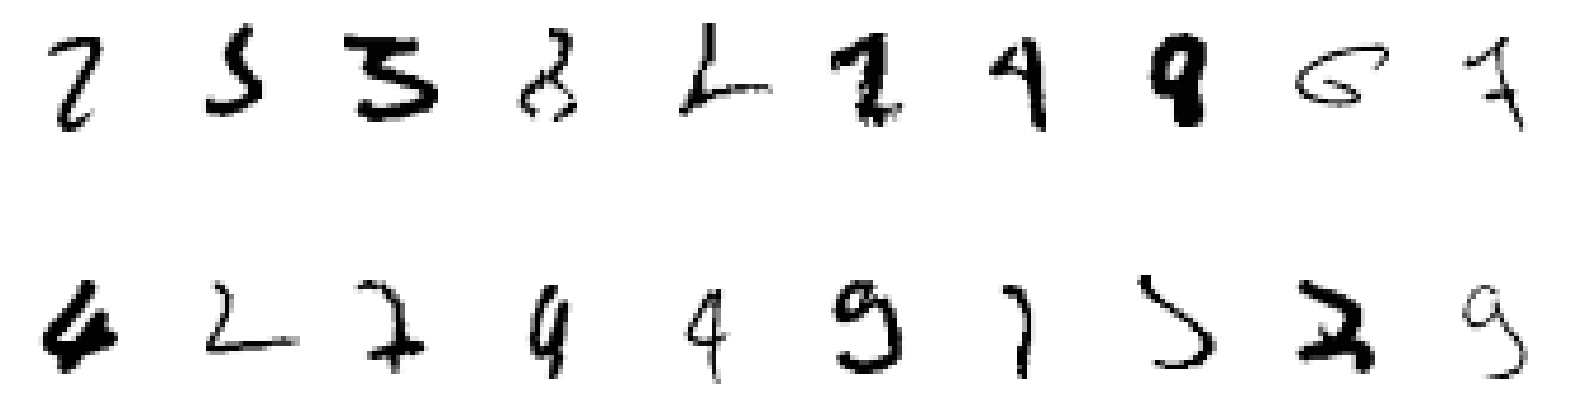

실제값
2 5 3 8 2 2 4 8 6 7 4 2 7 9 4 9 7 5 2 9 
예측값
7 3 5 2 4 1 9 9 5 1 6 4 2 4 9 5 1 3 3 5 

In [41]:
# 오답 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[diff_index[i]].reshape((28, 28)), cmap='Greys')
    plt.axis('off')
plt.show()
print('실제값')
for i in range(20):
    print(y_test[diff_index[i]], end=' ')
print('\n예측값')
for i in range(20):
    print(y_pred[diff_index[i]], end=' ')